In [2]:
# importing a packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.layers import LSTM ,Dense, Dropout, GRU # type: ignore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings('ignore')

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [3]:
# Defining a the sysmbol of TATA Steel from Yahoo finanace
tataSteel_symbol = 'TATASTEEL.NS'

# Fetching a live data of TATA Steel share
tataSteel_ticker = yf.Ticker(tataSteel_symbol)

# Get historical data of TATA steel last 20y data with a 1 day interval
tataSteel_DF = tataSteel_ticker.history(period='max', interval='1d')

# Sample of data
tataSteel_DF.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,2.434930,2.444107,2.404953,2.437989,10242229,0.0,0.0
1996-01-02 00:00:00+05:30,2.434930,2.444107,2.386598,2.392716,16954313,0.0,0.0
1996-01-03 00:00:00+05:30,2.392717,2.447166,2.386599,2.393328,13514114,0.0,0.0
1996-01-04 00:00:00+05:30,2.355397,2.355397,2.263628,2.317466,34785820,0.0,0.0
1996-01-05 00:00:00+05:30,2.289325,2.300337,2.248334,2.271582,30138033,0.0,0.0


In [4]:
def preProcessing(copyOfDataframe):
    '''
        Excluding divident and stock splits because it always zero
    '''
    copyOfDataframe = copyOfDataframe.drop(columns=['Dividends', 'Stock Splits'], errors='ignore')
    
    # Extrating a Number of year, month, week and day
    copyOfDataframe['Year']  = copyOfDataframe.index.year
    copyOfDataframe['Month'] = copyOfDataframe.index.month
    copyOfDataframe['Week']  = copyOfDataframe.index.day_of_week
    copyOfDataframe['Day']  = copyOfDataframe.index.day
    
    # Dropping a origal Date column
    copyOfDataframe = copyOfDataframe.reset_index(drop=True)
    
    # Drop row with missing values
    copyOfDataframe = copyOfDataframe.dropna()
    
    # Reordering a columns values 
    copyOfDataframe = copyOfDataframe[['Year', 'Month', 'Week','Day','Open','High','Low', 'Close', 'Volume']]
    
    return copyOfDataframe

In [5]:
# Calling funcation preProcessing() and storing a dataframe into tataSteel_DF
tataSteel_DF = preProcessing(tataSteel_DF.copy())
tataSteel_DF

,Year,Month,Week,Day,Open,High,Low,Close,Volume
0,1996,1,0,1,2.434930,2.444107,2.404953,2.437989,10242229
1,1996,1,1,2,2.434930,2.444107,2.386598,2.392716,16954313
2,1996,1,2,3,2.392717,2.447166,2.386599,2.393328,13514114
3,1996,1,3,4,2.355397,2.355397,2.263628,2.317466,34785820
4,1996,1,4,5,2.289325,2.300337,2.248334,2.271582,30138033
...,...,...,...,...,...,...,...,...,...
7194,2024,8,3,22,152.509995,154.350006,152.509995,154.139999,36719176
7195,2024,8,4,23,154.000000,154.389999,152.550003,154.199997,31490857
7196,2024,8,0,26,154.610001,156.399994,153.699997,155.699997,32497603
7197,2024,8,1,27,155.800003,156.500000,154.600006,154.699997,24523684


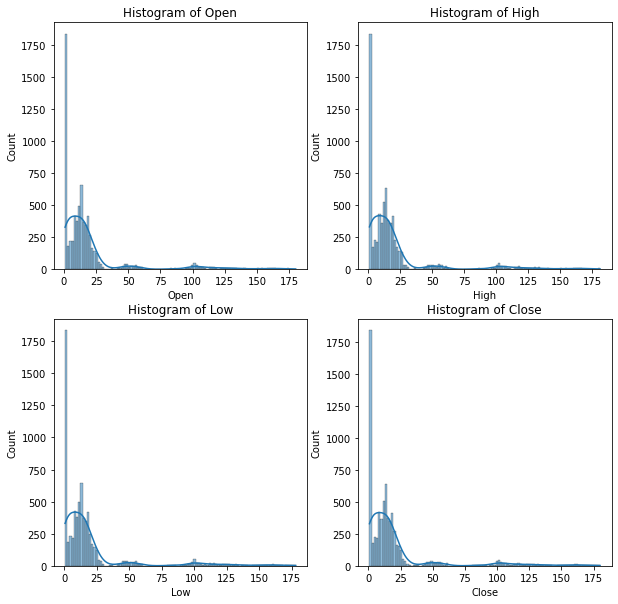

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for i, (colm, ax) in enumerate(zip(['Open','High','Low', 'Close','Volume'], ax.flatten())):
  sns.histplot(data=tataSteel_DF, x=colm, ax=ax, kde=True)
  ax.set_title(f'Histogram of {colm}')

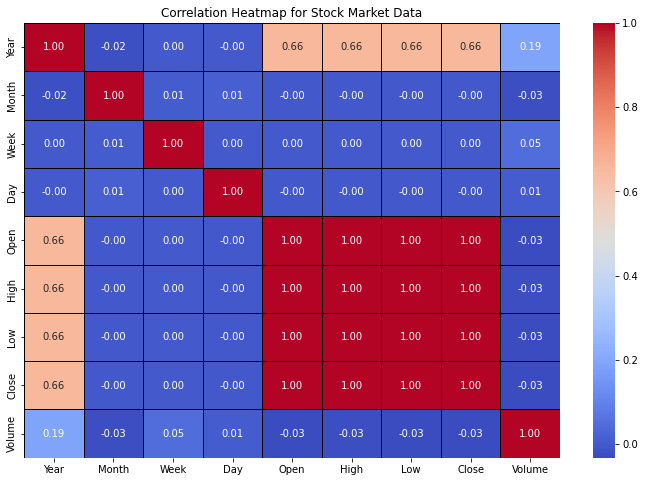

In [7]:
#Compute Correlation matrix
correlation_matrix = tataSteel_DF.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for Stock Market Data')
plt.show()

In [8]:
x = tataSteel_DF.drop('Close', axis=1)
y = tataSteel_DF['Close']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardizing the feactures
Scaler = StandardScaler()
X_train_scale = Scaler.fit_transform(X_train)
X_test_scale  = Scaler.transform(X_test)

print('Shape X train: ',X_train.shape)
print('Shape X test: ',X_test.shape)
print('Shape y train: ',Y_train.shape)
print('Shape y test: ',Y_test.shape)

Shape X train:  (5039, 8)
Shape X test:  (2160, 8)
Shape y train:  (5039,)
Shape y test:  (2160,)


In [9]:
# Model initializaiton
linear_model = LinearRegression()

linear_model.fit(X_train_scale, Y_train)

# Predict
y_train_pred = linear_model.predict(X_train_scale)
y_test_pred = linear_model.predict(X_test_scale)

In [10]:
# Calculate metrics
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)
train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Train MSE: 0.06785761843248202
Test MSE: 0.06850727970145969
Train R^2: 0.9999292923548267
Test R^2: 0.9999363078192487


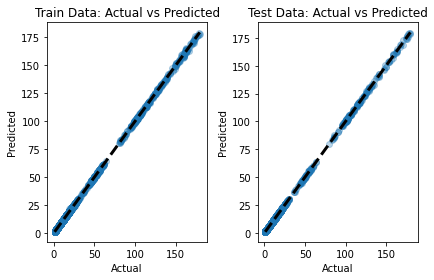

In [11]:
#Train data plot
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred, alpha=0.3)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data: Actual vs Predicted')

# Test data plot
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [12]:
# Extracting a columns from the dataset
features_df = tataSteel_DF[['Open','High','Low', 'Close','Volume']]
sequence_len = 10

# scaling a data into MinMaxScaler
scaler_gru = MinMaxScaler()
scaled_features_GRU = scaler_gru.fit_transform(features_df)
# Initializing x and y array for storing a scaled data 
x = []
y = []

# Iteration over the scaled data and sotring into x and y for spliting a data into test and training dataset
for i in range(sequence_len, len(scaled_features_GRU)):
    x.append(scaled_features_GRU[i-sequence_len:i])
    y.append(scaled_features_GRU[i,3])
# assigning a numpy array to x and y
x, y = np.array(x), np.array(y)

#Spliting a data into trainning and testing for training a model.
x_train_gru, x_test_gru, y_train_gru, y_test_gru = train_test_split(x,y, test_size=0.3, random_state=42
                                                                    , shuffle=False)

# Printing a trainning and testing data shape
print(x_train_gru.shape, x_test_gru.shape, y_train_gru.shape,y_test_gru)

(5032, 10, 5) (2157, 10, 5) (5032,) [0.04323078 0.04250226 0.04252195 ... 0.86464411 0.85906012 0.85347614]


In [13]:
input_shape=(x_train_gru.shape[1], x_train_gru.shape[2])
gru_model = Sequential([
    layers.Input(shape=input_shape),
    layers.GRU(16, activation='tanh', return_sequences=True),
    layers.GRU(32, activation='tanh', return_sequences=True),
    layers.GRU(64, activation='tanh', return_sequences=True),
    layers.GRU(128, activation='tanh', return_sequences=True),
    layers.Dense(1, activation='sigmoid')
])



In [14]:
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
gru_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 16)            1104      
                                                                 
 gru_1 (GRU)                 (None, 10, 32)            4800      
                                                                 
 gru_2 (GRU)                 (None, 10, 64)            18816     
                                                                 
 gru_3 (GRU)                 (None, 10, 128)           74496     
                                                                 
 dense (Dense)               (None, 10, 1)             129       
                                                                 
Total params: 99345 (388.07 KB)
Trainable params: 99345 (388.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# History of the training prosses, including metrics such as loss and MEA is assigned to a variable named 'histry_gru' for anlysis
history_gru =gru_model.fit(x_train_gru, y_train_gru, epochs=50, batch_size = 32, validation_split=0.3)

Epoch 1/50
111/111 [==============================] - 8s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0850 - val_loss: 0.0054 - val_mean_absolute_error: 0.0693
Epoch 2/50
111/111 [==============================] - 2s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0292 - val_loss: 0.0056 - val_mean_absolute_error: 0.0720
Epoch 3/50
111/111 [==============================] - 2s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0285 - val_loss: 0.0057 - val_mean_absolute_error: 0.0724
Epoch 4/50
111/111 [==============================] - 2s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0284 - val_loss: 0.0057 - val_mean_absolute_error: 0.0725
Epoch 5/50
111/111 [==============================] - 2s 17ms/step - loss: 0.0019 - mean_absolute_error: 0.0284 - val_loss: 0.0057 - val_mean_absolute_error: 0.0725
Epoch 6/50
111/111 [==============================] - 2s 16ms/step - loss: 0.0019 - mean_absolute_error: 0.0284 - val_loss: 0.0057 - val_mean_absolute_error: 0.0725
Epoch 7/50

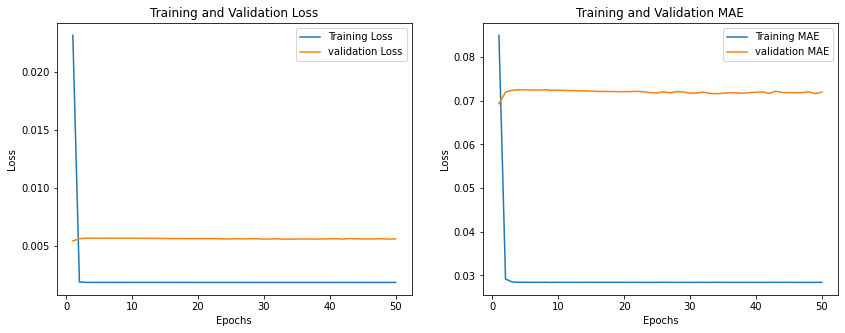

In [17]:
 # assigning a 50 epochs
epochs = list(range(1,51))

# initialize figure size
plt.figure(figsize=(14,5))

# Plotting a Training and validation Loss
plt.subplot(1,2,1)
plt.plot(epochs, history_gru.history['loss'], label='Training Loss')
plt.plot(epochs, history_gru.history['val_loss'], label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting a Mean Absolute Error
plt.subplot(1,2,2)
plt.plot(epochs, history_gru.history['mean_absolute_error'], label='Training MAE')
plt.plot(epochs, history_gru.history['val_mean_absolute_error'], label='validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

68/68 [==============================] - 0s 3ms/step


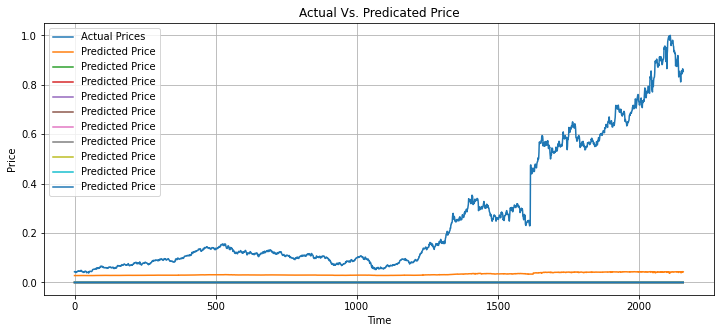

In [41]:
predicted_price_GRU = gru_model.predict(x_test_gru)
avg_pred_price_gru = np.mean(predicted_price_GRU, axis=1)
plt.figure(figsize=(12,5))
plt.plot(y_test_gru, label='Actual Prices')
plt.plot(predicted_price_GRU[:, :, 0], label='Predicted Price')
plt.title('Actual Vs. Predicated Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
input_shape=(x_train_gru.shape[1], x_train_gru.shape[2])
gru_model_2 = Sequential([
    layers.Input(shape=input_shape),
    layers.GRU(16, activation='relu', return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(32, activation='relu', return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(64, activation='relu', return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(128, activation='relu', return_sequences=True),
    layers.Dropout(0.2),
    layers.GRU(256, activation='relu', return_sequences=False),
    layers.Dense(1, activation='linear')
])

In [22]:
gru_model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
gru_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 10, 16)            1104      
                                                                 
 dropout (Dropout)           (None, 10, 16)            0         
                                                                 
 gru_5 (GRU)                 (None, 10, 32)            4800      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 gru_6 (GRU)                 (None, 10, 64)            18816     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_7 (GRU)                 (None, 10, 128)          

In [23]:
# History of the training prosses, including metrics such as loss and MEA is assigned to a variable named 'histry_gru_2' for anlysis
history_gru_2 = gru_model_2.fit(x_train_gru, y_train_gru, epochs=50, batch_size = 32, validation_split=0.2)

Epoch 1/50
126/126 [==============================] - 9s 34ms/step - loss: 3.8111e-04 - mean_absolute_error: 0.0122 - val_loss: 2.4551e-05 - val_mean_absolute_error: 0.0037
Epoch 2/50
126/126 [==============================] - 4s 30ms/step - loss: 1.2865e-04 - mean_absolute_error: 0.0064 - val_loss: 1.8012e-05 - val_mean_absolute_error: 0.0033
Epoch 3/50
126/126 [==============================] - 4s 33ms/step - loss: 1.0735e-04 - mean_absolute_error: 0.0055 - val_loss: 2.5727e-05 - val_mean_absolute_error: 0.0039
Epoch 4/50
126/126 [==============================] - 4s 32ms/step - loss: 1.0911e-04 - mean_absolute_error: 0.0055 - val_loss: 1.4343e-05 - val_mean_absolute_error: 0.0030
Epoch 5/50
126/126 [==============================] - 4s 33ms/step - loss: 1.0861e-04 - mean_absolute_error: 0.0055 - val_loss: 1.4349e-05 - val_mean_absolute_error: 0.0030
Epoch 6/50
126/126 [==============================] - 4s 31ms/step - loss: 1.0623e-04 - mean_absolute_error: 0.0055 - val_loss: 2.8132e

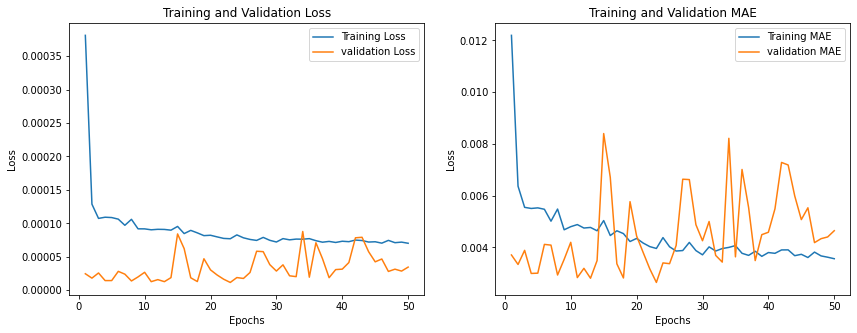

In [24]:
 # assigning a 50 epochs
epochs = list(range(1,51))

# initialize figure size
plt.figure(figsize=(14,5))

# Plotting a Training and validation Loss
plt.subplot(1,2,1)
plt.plot(epochs, history_gru_2.history['loss'], label='Training Loss')
plt.plot(epochs, history_gru_2.history['val_loss'], label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting a Mean Absolute Error
plt.subplot(1,2,2)
plt.plot(epochs, history_gru_2.history['mean_absolute_error'], label='Training MAE')
plt.plot(epochs, history_gru_2.history['val_mean_absolute_error'], label='validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

68/68 [==============================] - 0s 6ms/step


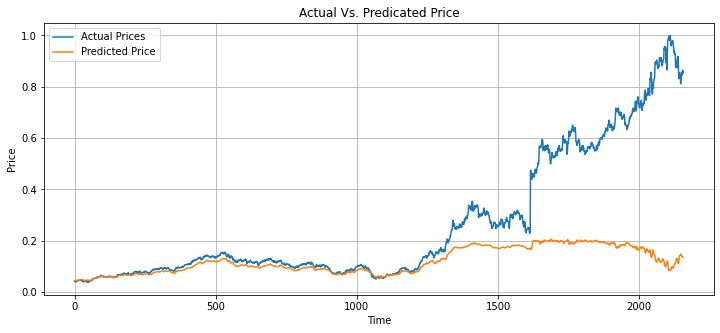

In [44]:
predicted_price_GRU_2 = gru_model_2.predict(x_test_gru)
plt.figure(figsize=(12,5))
plt.plot(y_test_gru, label='Actual Prices')
plt.plot(predicted_price_GRU_2, label='Predicted Price')
plt.title('Actual Vs. Predicated Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()